In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import datetime as dt
from sklearn import preprocessing
import seaborn as sns

#importing the KSU and MAC season 4 dataset and extracting the cultivars common in both the datasets
df1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ksu_flowering_2020-04-07T085237.csv" , delimiter=",")
df1.rename(columns = {'pass':'column', 'value':'days_to_flowering'}, inplace = True)

df2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Phenotypes/Modified/days_gdd_to_flowering_season_4_2020-03-10T175312.csv" , delimiter=",")
df2.rename(columns = {'value':'days_to_flowering'}, inplace = True)

km=np.intersect1d(df2['cultivar'], df1['cultivar'])
fl1=df1[df1["cultivar"].isin(km)]
fl2=df2[df2["cultivar"].isin(km)]

fl1.loc[:,'set']= 'KSU'
fl2.loc[:,'set']= 'MAC season 4'


fl2.index = pd.RangeIndex(start=0, stop=102, step=1)
fl1.index = pd.RangeIndex(start=0, stop=77, step=1)

fl2_date=fl2["date_of_flowering"]

#creating environmental features from weather data for MAC season 4. Calculating the mean, minimum and maximum for the variables.

env=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Environmental/weather_station_season_4_2019-12-20T190949.csv")
env['date']=pd.to_datetime(env.date)

#for mean
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []
for j in range(len(fl2_date)):
    li = (env['date']>= '2017-04-20') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    tmax.append(df_1['air_temp_max'].mean())
    tmin.append(df_1['air_temp_min'].mean())
    rh3.append(df_1['rh_mean'].mean())
    p1.append(df_1['precip_total'].mean())
    wsm.append(df_1['wind_speed_mean'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl2.insert(1,'temp_max_mean',tmax)
fl2.insert(2,'temp_min_mean',tmin)
fl2.insert(6,'rh_mean_mean',rh3)
fl2.insert(7,'totalpre_mean',p1)
fl2.insert(8,'wspeedmean_mean',wsm)
fl2.insert(12,'maxwind_mean',mws)
fl2.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2016-06-17') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t1.append(df_1['air_temp_max'].max())
    t2.append(df_1['air_temp_min'].max())
    r3.append(df_1['rh_mean'].max())
    p11.append(df_1['precip_total'].max())
    wsm1.append(df_1['wind_speed_mean'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl2.insert(1,'temp_max_max',t1)
fl2.insert(2,'temp_min_max',t2)
fl2.insert(3,'rh_mean_max',r3)
fl2.insert(4,'totalpre_max',p11)
fl2.insert(5,'wspeedmean_max',wsm1)
fl2.insert(6,'maxwind_max',mws1)
fl2.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2016-06-17') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t12.append(df_1['air_temp_max'].min())
    t22.append(df_1['air_temp_min'].min())
    r32.append(df_1['rh_mean'].min())
    p12.append(df_1['precip_total'].min())
    wsm2.append(df_1['wind_speed_mean'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl2.insert(1,'temp_max_min',t12)
fl2.insert(2,'temp_min_min',t22)
fl2.insert(3,'rh_mean_min',r32)
fl2.insert(4,'totalpre_min',p12)
fl2.insert(5,'wspeedmean_min',wsm2)
fl2.insert(6,'maxwind_min',mws2)
fl2.insert(7,'gddmin',gdd2)

#creating environmental features from weather data for KSU. Calculating the mean, minimum and maximum for the variables.

fl1_date=fl1["date_of_flowering"]
ksw=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ashland_bottoms_weather_2016_daily_2020-06-15.csv" , delimiter=",")
ksw['date']=pd.to_datetime(ksw.date)
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []

#for mean
for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    tmax.append(df_1['air_temp_max_C'].mean())
    tmin.append(df_1['air_temp_min_C'].mean())
    rh3.append(df_1['avg_rh'].mean())
    p1.append(df_1['precip_mm'].mean())
    wsm.append(df_1['avg_wind_speed'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl1.insert(1,'temp_max_mean',tmax)
fl1.insert(2,'temp_min_mean',tmin)
fl1.insert(6,'rh_mean_mean',rh3)
fl1.insert(7,'totalpre_mean',p1)
fl1.insert(8,'wspeedmean_mean',wsm)
fl1.insert(12,'maxwind_mean',mws)
fl1.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t1.append(df_1['air_temp_max_C'].max())
    t2.append(df_1['air_temp_min_C'].max())
    r3.append(df_1['avg_rh'].max())
    p11.append(df_1['precip_mm'].max())
    wsm1.append(df_1['avg_wind_speed'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl1.insert(1,'temp_max_max',t1)
fl1.insert(2,'temp_min_max',t2)
fl1.insert(3,'rh_mean_max',r3)
fl1.insert(4,'totalpre_max',p11)
fl1.insert(5,'wspeedmean_max',wsm1)
fl1.insert(6,'maxwind_max',mws1)
fl1.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t12.append(df_1['air_temp_max_C'].min())
    t22.append(df_1['air_temp_min_C'].min())
    r32.append(df_1['avg_rh'].min())
    p12.append(df_1['precip_mm'].min())
    wsm2.append(df_1['avg_wind_speed'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl1.insert(1,'temp_max_min',t12)
fl1.insert(2,'temp_min_min',t22)
fl1.insert(3,'rh_mean_min',r32)
fl1.insert(4,'totalpre_min',p12)
fl1.insert(5,'wspeedmean_min',wsm2)
fl1.insert(6,'maxwind_min',mws2)
fl1.insert(7,'gddmin',gdd2)

#combining KSU and MAC season 4 datasets
tmp1=fl1[['temp_max_mean', 'temp_min_mean', 'rh_mean_mean', 'totalpre_mean',
'wspeedmean_mean', 'maxwind_mean', 'gddmean', 'range', 'column',
'temp_max_max', 'temp_min_max','rh_mean_max','totalpre_max', 'wspeedmean_max','maxwind_max', 
'gddmax', 'temp_max_min', 'temp_min_min','rh_mean_min','totalpre_min',
'wspeedmean_min','maxwind_min', 'gddmin','cultivar','days_to_flowering','set']]

tmp2=fl2[['temp_max_mean', 'temp_min_mean', 'rh_mean_mean', 'totalpre_mean',
'wspeedmean_mean', 'maxwind_mean', 'gddmean', 'range', 'column',
'temp_max_max', 'temp_min_max','rh_mean_max','totalpre_max', 'wspeedmean_max','maxwind_max', 
'gddmax', 'temp_max_min', 'temp_min_min','rh_mean_min','totalpre_min',
'wspeedmean_min','maxwind_min', 'gddmin','cultivar','days_to_flowering','set']]

result = tmp1.append(tmp2, ignore_index=True)


[Text(0, 0, 'rh_mean_mean'),
 Text(0, 0, 'rh_mean_max'),
 Text(0, 0, 'rh_mean_min')]

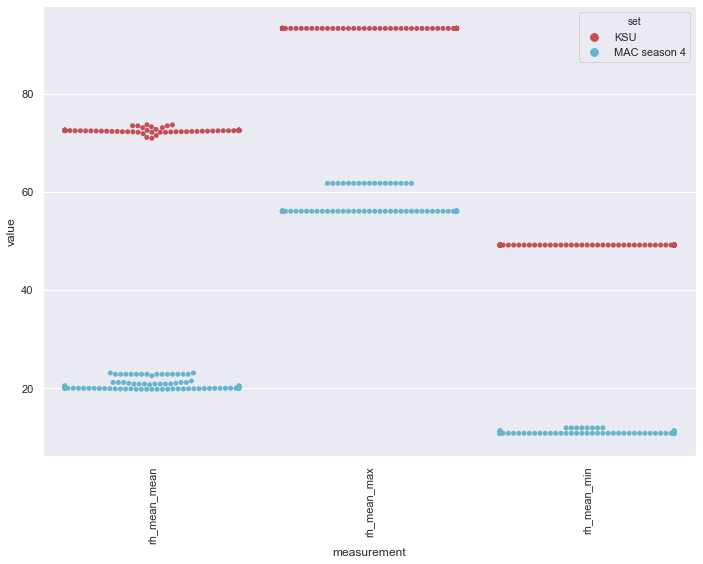

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#humidity


hum=result[['rh_mean_mean','rh_mean_max','rh_mean_min','set']]

tmp = pd.melt(hum, "set", var_name="measurement")

chart1=sns.swarmplot(x="measurement", y="value", hue="set", palette=["r", "c"], data=tmp)
chart1.set_xticklabels(labels=['rh_mean_mean','rh_mean_max','rh_mean_min'] ,rotation=90)


[Text(0, 0, 'gddmean'), Text(0, 0, 'gddmax'), Text(0, 0, 'gddmin')]

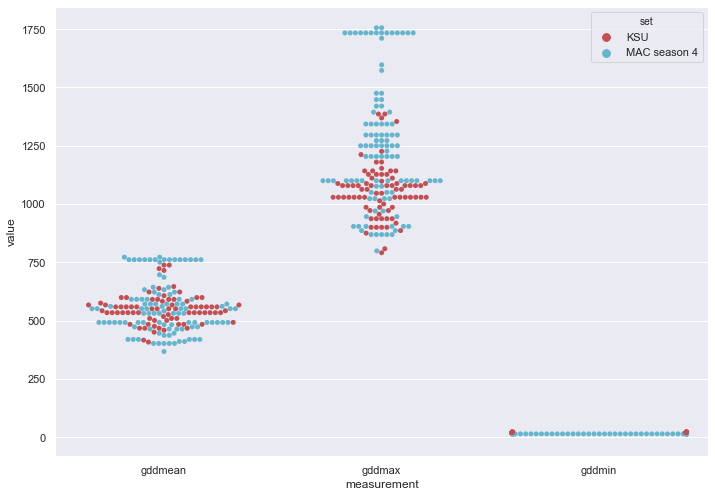

In [10]:
#Growing degree days

gdd=result[['gddmean', 'gddmax','gddmin','set']]

tmp = pd.melt(gdd, "set", var_name="measurement")

chart1=sns.swarmplot(x="measurement", y="value", hue="set", palette=["r", "c"], data=tmp)
chart1.set_xticklabels(labels=['gddmean', 'gddmax','gddmin'])

[Text(0, 0, 'temp_max_mean'),
 Text(0, 0, 'temp_max_max'),
 Text(0, 0, 'temp_max_min'),
 Text(0, 0, 'temp_min_mean'),
 Text(0, 0, 'temp_min_max'),
 Text(0, 0, 'temp_min_min')]

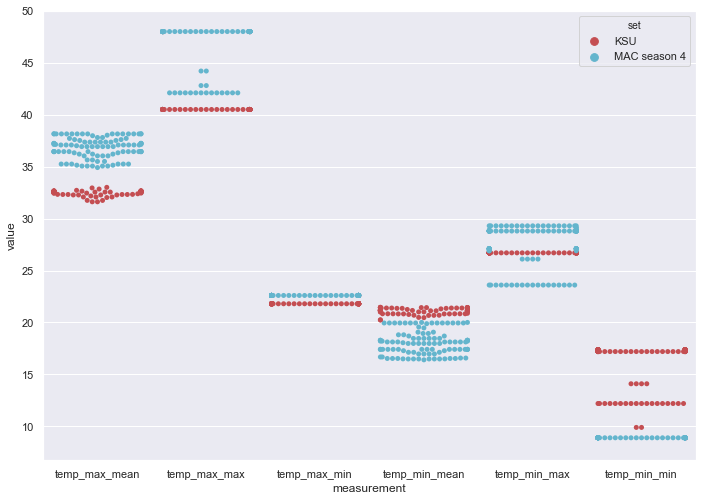

In [13]:
#temperature

tempa=result[['temp_max_mean', 'temp_max_max', 'temp_max_min','temp_min_mean', 'temp_min_max', 'temp_min_min','set']]

tmp = pd.melt(tempa, "set", var_name="measurement")

chart1=sns.swarmplot(x="measurement", y="value", hue="set", palette=["r", "c"], data=tmp)
chart1.set_xticklabels(labels=['temp_max_mean', 'temp_max_max', 'temp_max_min','temp_min_mean', 'temp_min_max', 'temp_min_min'])


[Text(0, 0, 'totalpre_mean'),
 Text(0, 0, 'totalpre_max'),
 Text(0, 0, 'totalpre_min'),
 Text(0, 0, 'wspeedmean_mean'),
 Text(0, 0, 'wspeedmean_max'),
 Text(0, 0, 'wspeedmean_min'),
 Text(0, 0, 'maxwind_mean'),
 Text(0, 0, 'maxwind_max'),
 Text(0, 0, 'maxwind_min')]

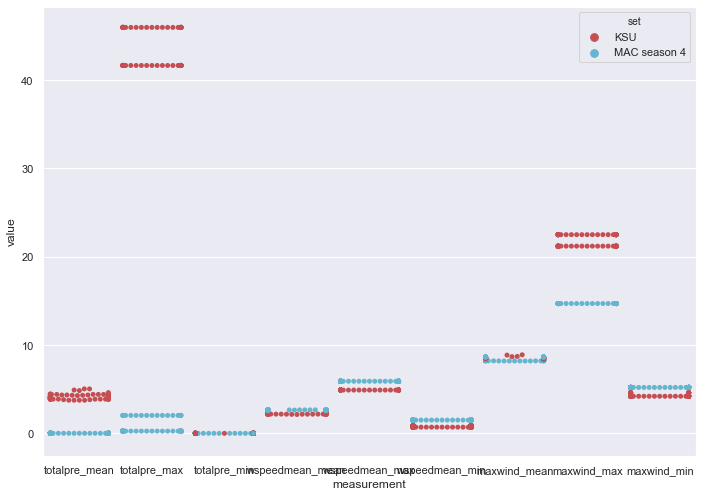

In [14]:
#Precipitation, wind speed, maximun wind speed
pre=result[['totalpre_mean','totalpre_max', 'totalpre_min','wspeedmean_mean', 'wspeedmean_max','wspeedmean_min',
            'maxwind_mean', 'maxwind_max', 'maxwind_min','set']]
tmp = pd.melt(pre, "set", var_name="measurement")

chart1=sns.swarmplot(x="measurement", y="value", hue="set", palette=["r", "c"], data=tmp)
chart1.set_xticklabels(labels=['totalpre_mean','totalpre_max', 'totalpre_min','wspeedmean_mean', 'wspeedmean_max','wspeedmean_min',
            'maxwind_mean', 'maxwind_max', 'maxwind_min'])